### Ingale Pradip 
#### Email: pradip_20may1985@yahoo.in

# Olympics Queries : SQL Project

In [1]:
import pandas as pd

In [3]:
import pymysql as pymysql

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
engine=pymysql.connect(db='sql_project',
                user='root', 
                passwd='Pradip@1985', 
                host='localhost', 
                port=3306)

In [15]:
engine

In [16]:
df=pd.read_sql_query('select * from athlete',engine)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,104834,Sami Sakari Salo,M,35.0,190.0,93.0,Finland,FIN,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Mens Ice Hockey,Bronze
1,20408,Svetlana Vladimirovna Chepelnikova,F,18.0,165.0,55.0,Belarus,BLR,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Womens 3000 metres,NoMedal
2,30023,Kenneth Benoit Ken Dreyfuss,M,28.0,164.0,50.0,United States,USA,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Mens Coxed Pairs,NoMedal
3,120558,Gran Lars Titus,M,21.0,188.0,73.0,Sweden,SWE,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Mens 4 x 100 metres Freestyle Relay,NoMedal
4,45133,Francesca Jean Fran Halsall,F,18.0,172.0,64.0,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Womens 100 metres Butterfly,NoMedal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,65714,Nataa Laen,F,26.0,175.0,70.0,Slovenia,SLO,1998 Winter,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Womens 5 kilometres,NoMedal
19996,506,Andrei Abraham,M,19.0,175.0,70.0,Romania,ROU,1936 Summer,1936,Summer,Berlin,Gymnastics,Gymnastics Mens Horse Vault,NoMedal
19997,7184,Kebede Balcha,M,28.0,166.0,49.0,Ethiopia,ETH,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Mens Marathon,NoMedal
19998,11936,Anna Margrethe Molla BjurstedtMallory,F,28.0,175.0,70.0,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Tennis,Tennis Womens Singles,Bronze


## Q1. Show how many medal counts present for entire data?

In [29]:
Q1=pd.read_sql_query("""select Medal, count(Medal) as Meadal_Count 
from athlete 
where Medal != 'NoMedal' 
group by Medal""",engine)

Q1

,Medal,Meadal_Count
0,Bronze,939
1,Gold,973
2,Silver,980


## Q2. Show count of unique Sports are present in olympics?

In [28]:
Q2= pd.read_sql_query("""select sport as Unique_Sports_Are_Present_in_Olympics 
from athlete 
group by sport""",engine)

Q2

,Unique_Sports_Are_Present_in_Olympics
0,Ice Hockey
1,Speed Skating
2,Rowing
3,Swimming
4,Athletics
...,...
58,Motorboating
59,Roque
60,Alpinism
61,Jeu De Paume


## Q3. Show how many different medals won by Team India in data?

In [30]:
Q3=pd.read_sql_query("""select Medal, count(Medal) as Medal_Won_by_India 
from athlete 
where Team = 'India' and Medal != 'NoMedal' 
group by Medal;""",engine)

Q3

,Medal,Medal_Won_by_India
0,Gold,4
1,Bronze,2
2,Silver,2


## Q4. Show event wise medals won by india show from highest to lowest medals won in order?

In [31]:
Q4=pd.read_sql_query("""select Event, Team, Medal, count(Medal) as Medal_Won 
from Athlete  
where Team = 'India' and Medal != 'NoMedal' 
group by Event, Medal""",engine)

Q4

,Event,Team,Medal,Medal_Won
0,Hockey Mens Hockey,India,Gold,4
1,Hockey Mens Hockey,India,Bronze,1
2,Hockey Mens Hockey,India,Silver,1
3,Badminton Womens Singles,India,Bronze,1
4,Shooting Mens Double Trap,India,Silver,1


## Q5. Show event and yearwise medals won by india in order of year?

In [33]:
Q5=pd.read_sql_query("""select Event, Year, Team, Medal 
from Athlete  
where Team = 'India' and Medal != 'NoMedal'
order by Year""",engine)

Q5

,Event,Year,Team,Medal
0,Hockey Mens Hockey,1928,India,Gold
1,Hockey Mens Hockey,1932,India,Gold
2,Hockey Mens Hockey,1948,India,Gold
3,Hockey Mens Hockey,1952,India,Gold
4,Hockey Mens Hockey,1960,India,Silver
5,Hockey Mens Hockey,1972,India,Bronze
6,Shooting Mens Double Trap,2004,India,Silver
7,Badminton Womens Singles,2012,India,Bronze


## Q6. Show the country with maximum medals won gold, silver, bronze?

In [41]:
Q6_a=pd.read_sql_query("""select Team, count(Medal) as Gold_Medal
from Athlete
where Medal = 'Gold' 
group by team
order by Gold_Medal desc limit 1""",engine)

Q6_a

,Team,Gold_Medal
0,United States,171


In [42]:
Q6_b=pd.read_sql_query("""select Team, count(Medal) as Silver_Medal
from Athlete
where Medal = 'Silver' 
group by team
order by Silver_Medal desc limit 1 """,engine)

Q6_b

,Team,Silver_Medal
0,United States,118


In [43]:
Q6_c=pd.read_sql_query("""select Team, count(Medal) as Bronze_Medal
from Athlete
where Medal = 'Bronze' 
group by team
order by Bronze_Medal desc limit 1""",engine)

Q6_c

,Team,Bronze_Medal
0,United States,103


## Q7. Show the top 10 countries with respect to gold medals?

In [44]:
Q7=pd.read_sql_query("""select Team, count(Medal) as Gold_Medal
from Athlete
where Medal = 'Gold' 
group by team
order by Gold_Medal desc 
limit 10""",engine)

Q7

,Team,Gold_Medal
0,United States,171
1,Soviet Union,82
2,Germany,60
3,Great Britain,41
4,Italy,36
5,Sweden,36
6,France,33
7,East Germany,31
8,Canada,31
9,Netherlands,27


## Q8. Show in which year did United States won most medals?

In [46]:
Q8=pd.read_sql_query("""select Team, Year, count(Medal) as Medal
from Athlete
where Team = 'United States' and Medal != 'NoMedal' 
group by year
order by Medal desc 
limit 1""",engine)

Q8

,Team,Year,Medal
0,United States,1984,29


## Q9. In which sports United States has most medals?

In [47]:
Q9=pd.read_sql_query("""select Team, Sport, count(Medal) as Medal
from Athlete
where Team = 'United States' and Medal != 'NoMedal' 
group by Sport
order by Medal desc 
limit 1""",engine)

Q9

,Team,Sport,Medal
0,United States,Swimming,90


## Q10. Find top 3 players who have won most medals along with their sports and country?

In [48]:
Q10=pd.read_sql_query("""select Name, Team, Sport, count(Medal) as Medal
from Athlete
where Medal != 'NoMedal'
group by Name, Team, Sport
order by medal desc
limit 3""",engine)

Q10

,Name,Team,Sport,Medal
0,Gerard Theodor Hubert Van Innis,Belgium,Archery,5
1,Michael Fred Phelps II,United States,Swimming,4
2,Guo Jingjing,China,Diving,4


## Q11. Find player with most gold medals in cycling along with his country?

In [49]:
Q11=pd.read_sql_query("""select Name, Team, Sport, count(Medal) as Medal
from Athlete
where Medal = 'Gold' and Sport = 'Cycling'
group by Name, Team, Sport
order by medal desc""",engine)

Q11

,Name,Team,Sport,Medal
0,Ren Wolff,Germany,Cycling,1
1,Michael Colin Turtur,Australia,Cycling,1
2,Artras Kasputis,Soviet Union,Cycling,1
3,Aristidis Konstantinidis,Greece,Cycling,1
4,Viktor Viktorovich Manakov,Soviet Union,Cycling,1
5,Greg Van Avermaet,Belgium,Cycling,1
6,Yury Alekseyevich Kashirin,Soviet Union,Cycling,1
7,Flicia Michele Sylviane Ballanger Vetu,France,Cycling,1
8,Christian Meyer,Germany,Cycling,1
9,Leandro Faggin,Italy,Cycling,1


## Q12. Find player with most medals (Gold + Silver + Bronze) in Basketball also show his country?

In [50]:
Q12=pd.read_sql_query("""select Name, Team, Sport, Medal as Medal_Name, count(Medal) as Medal
from Athlete
where Sport = 'Basketball' and Medal != 'NoMedal'
group by Name, Team, Sport, Medal
order by medal desc""",engine)

Q12

,Name,Team,Sport,Medal_Name,Medal
0,Tamika Devonne Catchings,United States,Basketball,Gold,1
1,Felipe Reyes Cabaas,Spain,Basketball,Bronze,1
2,Nikki Kensengane McCray,United States,Basketball,Gold,1
3,Carl Leslie Shy,United States,Basketball,Gold,1
4,Matteo Soragna,Italy,Basketball,Silver,1
...,...,...,...,...,...
62,Wayman Lawrence Tisdale,United States,Basketball,Gold,1
63,Luca Garri,Italy,Basketball,Silver,1
64,Clmence Beikes,France,Basketball,Silver,1
65,Juan Carlos Navarro Feijoo,Spain,Basketball,Silver,1


## Q13. Find out the count of different medals of the top basketball player?

In [51]:
Q13=pd.read_sql_query("""select Name, Sport, Medal as Medal_Name, count(Medal) as Medal
from Athlete
where Sport = 'Basketball' and Medal !='NoMedal'
group by Name, Sport, Medal
order by medal desc""",engine)

Q13

,Name,Sport,Medal_Name,Medal
0,Tamika Devonne Catchings,Basketball,Gold,1
1,Felipe Reyes Cabaas,Basketball,Bronze,1
2,Nikki Kensengane McCray,Basketball,Gold,1
3,Carl Leslie Shy,Basketball,Gold,1
4,Matteo Soragna,Basketball,Silver,1
...,...,...,...,...
62,Wayman Lawrence Tisdale,Basketball,Gold,1
63,Luca Garri,Basketball,Silver,1
64,Clmence Beikes,Basketball,Silver,1
65,Juan Carlos Navarro Feijoo,Basketball,Silver,1


## Q14. Find out medals won by male, female each year . Export this data and plot graph ?

In [52]:
Q14=pd.read_sql_query("""select year, sex, count(Medal) as Medal
from Athlete
where Medal !='NoMedal' 
group by year, sex
order by year desc""",engine)

Q14

,year,sex,Medal
0,2016,F,76
1,2016,M,62
2,2014,F,25
3,2014,M,30
4,2012,F,71
...,...,...,...
63,1904,F,2
64,1904,M,39
65,1900,F,1
66,1900,M,52


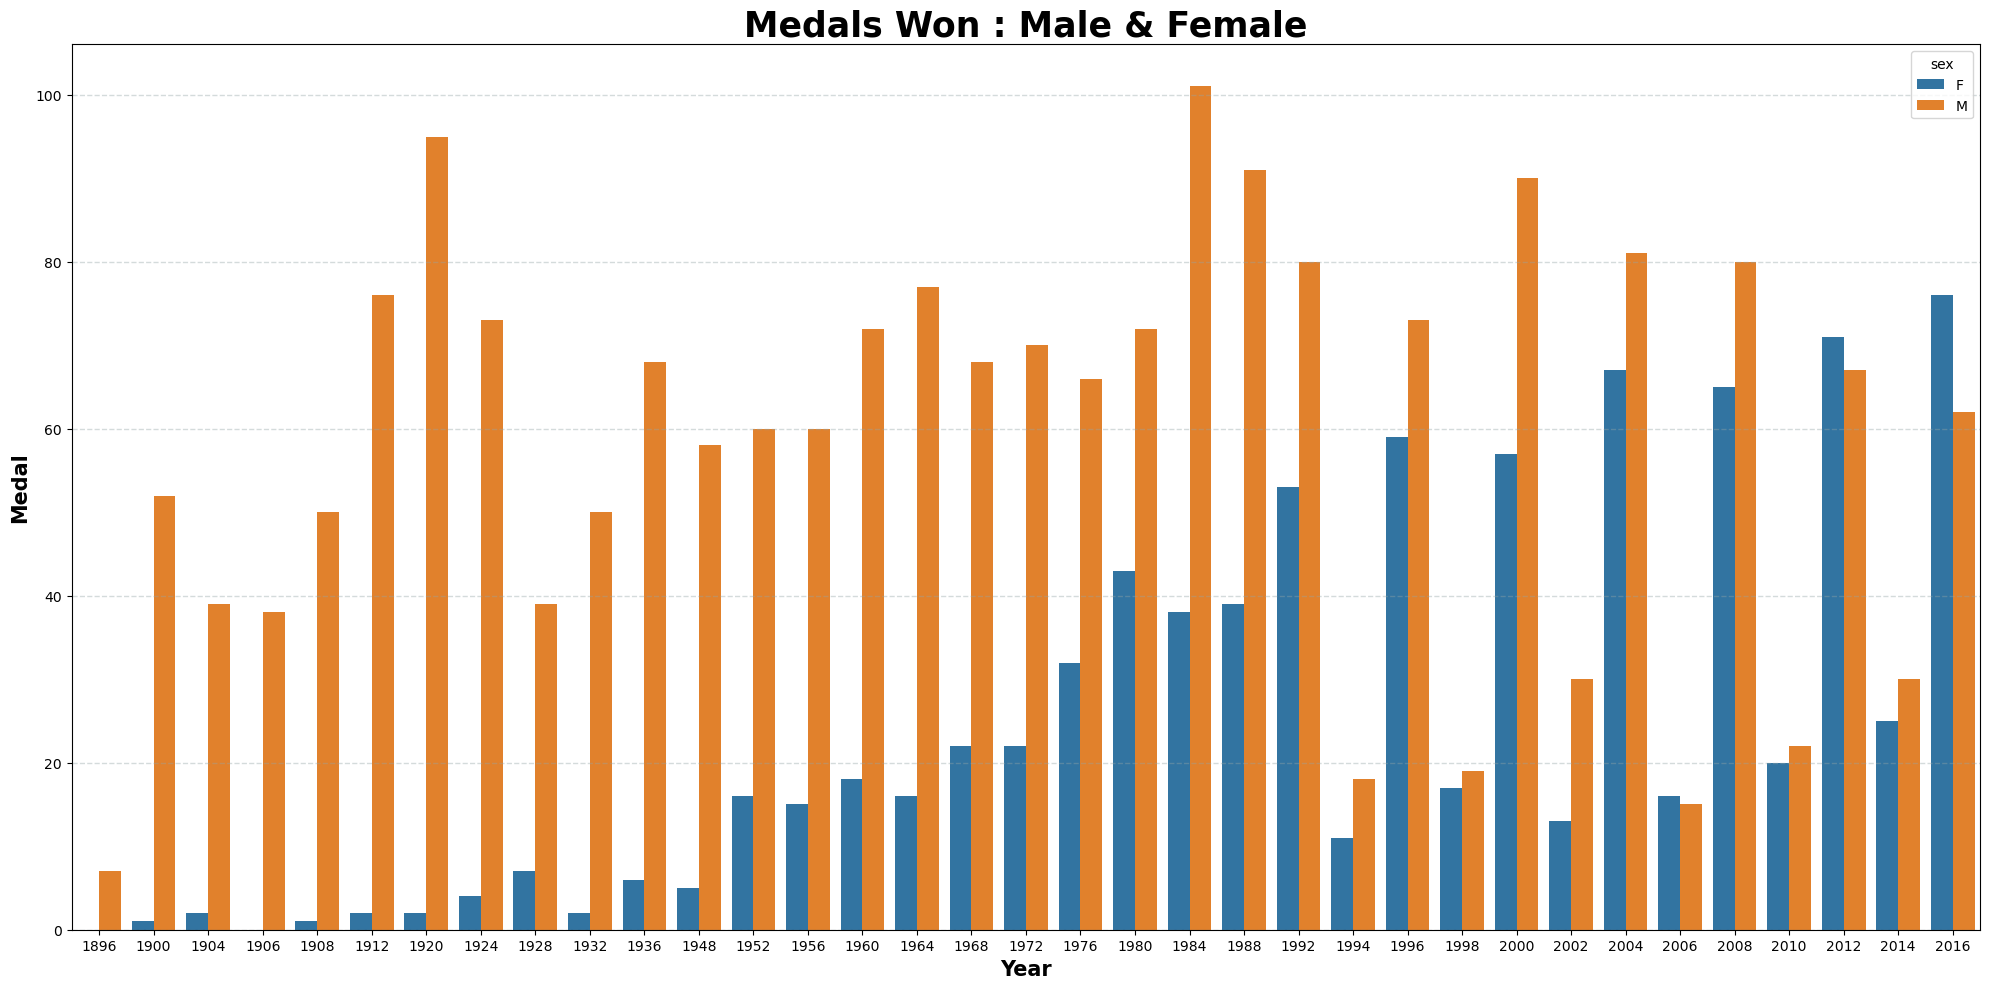

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
sns.barplot(x = 'year', y='Medal', data =Q14, hue='sex')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Medal', fontweight ='bold', fontsize = 15)
plt.title('Medals Won : Male & Female',fontweight ='bold', fontsize = 25)

plt.tight_layout()
plt.show()